## Resample Data to Different Frequencies

In this tutorial, we'll explore how to resample data using the gridstatusio API. For example. you'll see how to convert data reported every 5 minutes to an hourly format.

In [15]:
import plotly.graph_objects as go

import gridstatusio

gridstatusio.__version__

'0.13.0'

## Initialize the gridstatusio client

We set up the GridStatusClient to fetch our data.

In [2]:
client = gridstatusio.GridStatusClient()

## Fetch Data at Different Frequencies

First, let's query the raw 5 minute data to see what it looks like. We make sure to set a `limit` to the query to avoid using all of our monthly API rows.

In [3]:
QUERY_LIMIT = 10_000

In [4]:
df_5min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    timezone="market",
    limit=QUERY_LIMIT,
)

df_5min

2025-07-28 10:38:20 - INFO - Fetching Page 1...
2025-07-28 10:38:20 - INFO - GET https://api.gridstatus.io/v1/datasets/caiso_load/query
2025-07-28 10:38:20 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-09-02 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:21 - INFO - Done in 0.21 seconds. 
2025-07-28 10:38:21 - INFO - Total rows: 288/10,000 (2.88% of limit)
2025-07-28 10:38:21 - INFO - Total number of rows: 288


interval_start_local        interval_start_utc  \
0   2023-09-01 00:00:00-07:00 2023-09-01 07:00:00+00:00   
1   2023-09-01 00:05:00-07:00 2023-09-01 07:05:00+00:00   
2   2023-09-01 00:10:00-07:00 2023-09-01 07:10:00+00:00   
3   2023-09-01 00:15:00-07:00 2023-09-01 07:15:00+00:00   
4   2023-09-01 00:20:00-07:00 2023-09-01 07:20:00+00:00   
..                        ...                       ...   
283 2023-09-01 23:35:00-07:00 2023-09-02 06:35:00+00:00   
284 2023-09-01 23:40:00-07:00 2023-09-02 06:40:00+00:00   
285 2023-09-01 23:45:00-07:00 2023-09-02 06:45:00+00:00   
286 2023-09-01 23:50:00-07:00 2023-09-02 06:50:00+00:00   
287 2023-09-01 23:55:00-07:00 2023-09-02 06:55:00+00:00   

           interval_end_local          interval_end_utc   load  
0   2023-09-01 00:05:00-07:00 2023-09-01 07:05:00+00:00  27923  
1   2023-09-01 00:10:00-07:00 2023-09-01 07:10:00+00:00  28025  
2   2023-09-01 00:15:00-07:00 2023-09-01 07:15:00+00:00  28073  
3   2023-09-01 00:20:00-07:00 2023-09-01 07:20:00+00:00  27905  
4   2023-09-01 00:25:00-07:00 2023-09-01 07:25:00+00:00  27870  
..                        ...                       ...    ...  
283 2023-09-01 23:40:00-07:00 2023-09-02 06:40:00+00:00  27338  
284 2023-09-01 23:45:00-07:00 2023-09-02 06:45:00+00:00  27225  
285 2023-09-01 23:50:00-07:00 2023-09-02 06:50:00+00:00  27085  
286 2023-09-01 23:55:00-07:00 2023-09-02 06:55:00+00:00  26936  
287 2023-09-02 00:00:00-07:00 2023-09-02 07:00:00+00:00  26808  

[288 rows x 5 columns]

Next, you can get data at various time intervals by setting the `resample` option. In the example below, we change the data intervals to either 15 minutes or 1 hour. The API calculates the average of all values within each new time window to give us a 15 minute dataset instead of the default 5 minute dataset.

In [5]:
df_15min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="15 minutes",
    timezone="market",
    limit=QUERY_LIMIT,
)

df_15min.head(20)

2025-07-28 10:38:21 - INFO - Fetching Page 1...
2025-07-28 10:38:21 - INFO - GET https://api.gridstatus.io/v1/datasets/caiso_load/query
2025-07-28 10:38:21 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-09-02 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': '15 minutes', 'resample_by': None, 'resample_function': 'mean', 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:21 - INFO - Done in 0.17 seconds. 
2025-07-28 10:38:21 - INFO - Total rows: 96/10,000 (0.96% of limit)
2025-07-28 10:38:21 - INFO - Total number of rows: 96


interval_start_local        interval_start_utc  \
0  2023-09-01 00:00:00-07:00 2023-09-01 07:00:00+00:00   
1  2023-09-01 00:15:00-07:00 2023-09-01 07:15:00+00:00   
2  2023-09-01 00:30:00-07:00 2023-09-01 07:30:00+00:00   
3  2023-09-01 00:45:00-07:00 2023-09-01 07:45:00+00:00   
4  2023-09-01 01:00:00-07:00 2023-09-01 08:00:00+00:00   
5  2023-09-01 01:15:00-07:00 2023-09-01 08:15:00+00:00   
6  2023-09-01 01:30:00-07:00 2023-09-01 08:30:00+00:00   
7  2023-09-01 01:45:00-07:00 2023-09-01 08:45:00+00:00   
8  2023-09-01 02:00:00-07:00 2023-09-01 09:00:00+00:00   
9  2023-09-01 02:15:00-07:00 2023-09-01 09:15:00+00:00   
10 2023-09-01 02:30:00-07:00 2023-09-01 09:30:00+00:00   
11 2023-09-01 02:45:00-07:00 2023-09-01 09:45:00+00:00   
12 2023-09-01 03:00:00-07:00 2023-09-01 10:00:00+00:00   
13 2023-09-01 03:15:00-07:00 2023-09-01 10:15:00+00:00   
14 2023-09-01 03:30:00-07:00 2023-09-01 10:30:00+00:00   
15 2023-09-01 03:45:00-07:00 2023-09-01 10:45:00+00:00   
16 2023-09-01 04:00:00-07:00 2023-09-01 11:00:00+00:00   
17 2023-09-01 04:15:00-07:00 2023-09-01 11:15:00+00:00   
18 2023-09-01 04:30:00-07:00 2023-09-01 11:30:00+00:00   
19 2023-09-01 04:45:00-07:00 2023-09-01 11:45:00+00:00   

          interval_end_local          interval_end_utc          load  
0  2023-09-01 00:15:00-07:00 2023-09-01 07:15:00+00:00  28007.000000  
1  2023-09-01 00:30:00-07:00 2023-09-01 07:30:00+00:00  27838.333333  
2  2023-09-01 00:45:00-07:00 2023-09-01 07:45:00+00:00  27424.333333  
3  2023-09-01 01:00:00-07:00 2023-09-01 08:00:00+00:00  27042.000000  
4  2023-09-01 01:15:00-07:00 2023-09-01 08:15:00+00:00  26691.000000  
5  2023-09-01 01:30:00-07:00 2023-09-01 08:30:00+00:00  26438.000000  
6  2023-09-01 01:45:00-07:00 2023-09-01 08:45:00+00:00  26097.666667  
7  2023-09-01 02:00:00-07:00 2023-09-01 09:00:00+00:00  25803.666667  
8  2023-09-01 02:15:00-07:00 2023-09-01 09:15:00+00:00  25525.000000  
9  2023-09-01 02:30:00-07:00 2023-09-01 09:30:00+00:00  25338.666667  
10 2023-09-01 02:45:00-07:00 2023-09-01 09:45:00+00:00  25100.333333  
11 2023-09-01 03:00:00-07:00 2023-09-01 10:00:00+00:00  24894.000000  
12 2023-09-01 03:15:00-07:00 2023-09-01 10:15:00+00:00  24751.666667  
13 2023-09-01 03:30:00-07:00 2023-09-01 10:30:00+00:00  24629.333333  
14 2023-09-01 03:45:00-07:00 2023-09-01 10:45:00+00:00  24479.333333  
15 2023-09-01 04:00:00-07:00 2023-09-01 11:00:00+00:00  24377.000000  
16 2023-09-01 04:15:00-07:00 2023-09-01 11:15:00+00:00  24422.000000  
17 2023-09-01 04:30:00-07:00 2023-09-01 11:30:00+00:00  24534.666667  
18 2023-09-01 04:45:00-07:00 2023-09-01 11:45:00+00:00  24592.333333  
19 2023-09-01 05:00:00-07:00 2023-09-01 12:00:00+00:00  24654.000000

Let's try a 1 hour resample of the CAISO load data.

In [6]:
df_hourly = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    timezone="market",
    limit=QUERY_LIMIT,
)
df_hourly.head(10)

2025-07-28 10:38:21 - INFO - Fetching Page 1...
2025-07-28 10:38:21 - INFO - GET https://api.gridstatus.io/v1/datasets/caiso_load/query
2025-07-28 10:38:21 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-09-02 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': '1 hour', 'resample_by': None, 'resample_function': 'mean', 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:21 - INFO - Done in 0.15 seconds. 
2025-07-28 10:38:21 - INFO - Total rows: 24/10,000 (0.24% of limit)
2025-07-28 10:38:21 - INFO - Total number of rows: 24


interval_start_local        interval_start_utc  \
0 2023-09-01 00:00:00-07:00 2023-09-01 07:00:00+00:00   
1 2023-09-01 01:00:00-07:00 2023-09-01 08:00:00+00:00   
2 2023-09-01 02:00:00-07:00 2023-09-01 09:00:00+00:00   
3 2023-09-01 03:00:00-07:00 2023-09-01 10:00:00+00:00   
4 2023-09-01 04:00:00-07:00 2023-09-01 11:00:00+00:00   
5 2023-09-01 05:00:00-07:00 2023-09-01 12:00:00+00:00   
6 2023-09-01 06:00:00-07:00 2023-09-01 13:00:00+00:00   
7 2023-09-01 07:00:00-07:00 2023-09-01 14:00:00+00:00   
8 2023-09-01 08:00:00-07:00 2023-09-01 15:00:00+00:00   
9 2023-09-01 09:00:00-07:00 2023-09-01 16:00:00+00:00   

         interval_end_local          interval_end_utc          load  
0 2023-09-01 01:00:00-07:00 2023-09-01 08:00:00+00:00  27577.916667  
1 2023-09-01 02:00:00-07:00 2023-09-01 09:00:00+00:00  26257.583333  
2 2023-09-01 03:00:00-07:00 2023-09-01 10:00:00+00:00  25214.500000  
3 2023-09-01 04:00:00-07:00 2023-09-01 11:00:00+00:00  24559.333333  
4 2023-09-01 05:00:00-07:00 2023-09-01 12:00:00+00:00  24550.750000  
5 2023-09-01 06:00:00-07:00 2023-09-01 13:00:00+00:00  25339.000000  
6 2023-09-01 07:00:00-07:00 2023-09-01 14:00:00+00:00  26677.666667  
7 2023-09-01 08:00:00-07:00 2023-09-01 15:00:00+00:00  27467.500000  
8 2023-09-01 09:00:00-07:00 2023-09-01 16:00:00+00:00  27455.166667  
9 2023-09-01 10:00:00-07:00 2023-09-01 17:00:00+00:00  27274.666667

## Visualize the Data

We'll use Plotly to visualize the CAISO load data that we've resampled to different frequencies. We can see how the the timeseries was averaged when resampled.

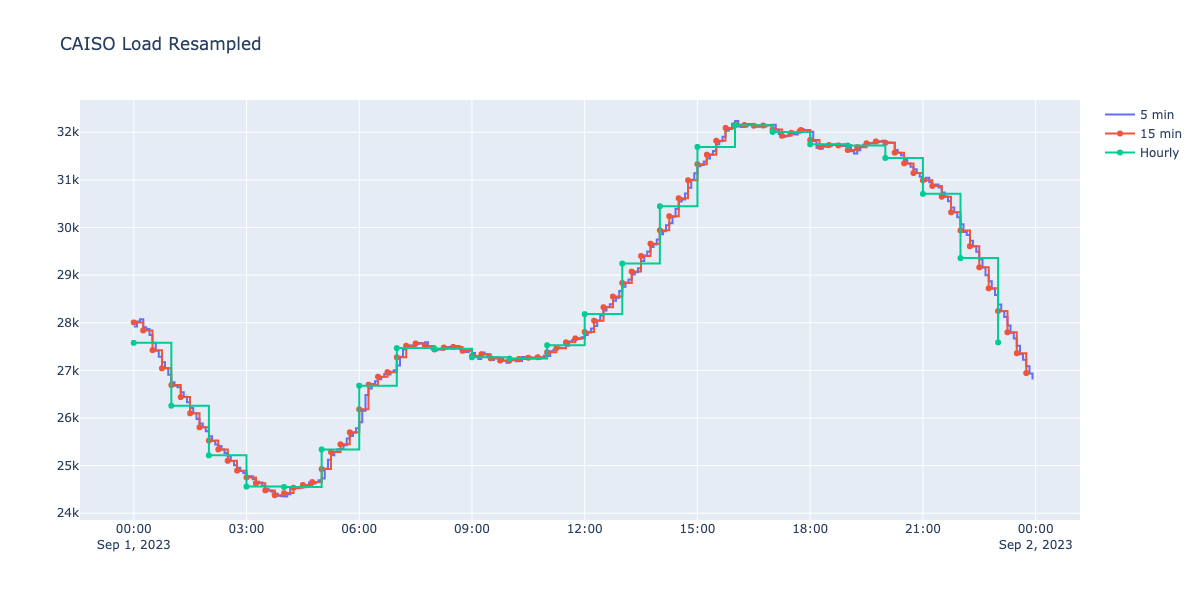

In [7]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_5min["interval_start_local"],
        y=df_5min["load"],
        name="5 min",
        mode="lines",
        line_shape="hv",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_15min["interval_start_local"],
        y=df_15min["load"],
        name="15 min",
        mode="lines+markers",
        line_shape="hv",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly["interval_start_local"],
        y=df_hourly["load"],
        name="Hourly",
        mode="lines+markers",
        line_shape="hv",
    )
)

fig.update_layout(title="CAISO Load Resampled")

fig.show("png", width=1200, height=600)

## Change the resampling function

By default, values within each resampling window are an aggregated mean (`mean`). This can be changed with the `resample_function` parameter. Possible values are `mean`, `sum`, `min`, `max`, `stddev`, `count`, `variance`. If resample is `None`, this `resample_function` value is ignored.

Below, we also query for the `min` and `max` of the load in each 1 hour resampling window and then plot the results.

In [8]:
df_hourly_min = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    resample_function="min",
    timezone="market",
    limit=QUERY_LIMIT,
)

df_hourly_max = client.get_dataset(
    dataset="caiso_load",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 hour",
    resample_function="max",
    timezone="market",
    limit=QUERY_LIMIT,
)

df_hourly_min.head(10)

2025-07-28 10:38:22 - INFO - Fetching Page 1...
2025-07-28 10:38:22 - INFO - GET https://api.gridstatus.io/v1/datasets/caiso_load/query
2025-07-28 10:38:22 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-09-02 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': '1 hour', 'resample_by': None, 'resample_function': 'min', 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:22 - INFO - Done in 0.18 seconds. 
2025-07-28 10:38:22 - INFO - Total rows: 24/10,000 (0.24% of limit)
2025-07-28 10:38:22 - INFO - Total number of rows: 24
2025-07-28 10:38:22 - INFO - Fetching Page 1...
2025-07-28 10:38:22 - INFO - GET https://api.gridstatus.io/v1/datasets/caiso_load/query
2025-07-28 10:38:22 - INFO - Params: {'start_time': Tim

interval_start_local        interval_start_utc  \
0 2023-09-01 00:00:00-07:00 2023-09-01 07:00:00+00:00   
1 2023-09-01 01:00:00-07:00 2023-09-01 08:00:00+00:00   
2 2023-09-01 02:00:00-07:00 2023-09-01 09:00:00+00:00   
3 2023-09-01 03:00:00-07:00 2023-09-01 10:00:00+00:00   
4 2023-09-01 04:00:00-07:00 2023-09-01 11:00:00+00:00   
5 2023-09-01 05:00:00-07:00 2023-09-01 12:00:00+00:00   
6 2023-09-01 06:00:00-07:00 2023-09-01 13:00:00+00:00   
7 2023-09-01 07:00:00-07:00 2023-09-01 14:00:00+00:00   
8 2023-09-01 08:00:00-07:00 2023-09-01 15:00:00+00:00   
9 2023-09-01 09:00:00-07:00 2023-09-01 16:00:00+00:00   

         interval_end_local          interval_end_utc     load  
0 2023-09-01 01:00:00-07:00 2023-09-01 08:00:00+00:00  26908.0  
1 2023-09-01 02:00:00-07:00 2023-09-01 09:00:00+00:00  25721.0  
2 2023-09-01 03:00:00-07:00 2023-09-01 10:00:00+00:00  24844.0  
3 2023-09-01 04:00:00-07:00 2023-09-01 11:00:00+00:00  24358.0  
4 2023-09-01 05:00:00-07:00 2023-09-01 12:00:00+00:00  24352.0  
5 2023-09-01 06:00:00-07:00 2023-09-01 13:00:00+00:00  24729.0  
6 2023-09-01 07:00:00-07:00 2023-09-01 14:00:00+00:00  25911.0  
7 2023-09-01 08:00:00-07:00 2023-09-01 15:00:00+00:00  27101.0  
8 2023-09-01 09:00:00-07:00 2023-09-01 16:00:00+00:00  27383.0  
9 2023-09-01 10:00:00-07:00 2023-09-01 17:00:00+00:00  27162.0

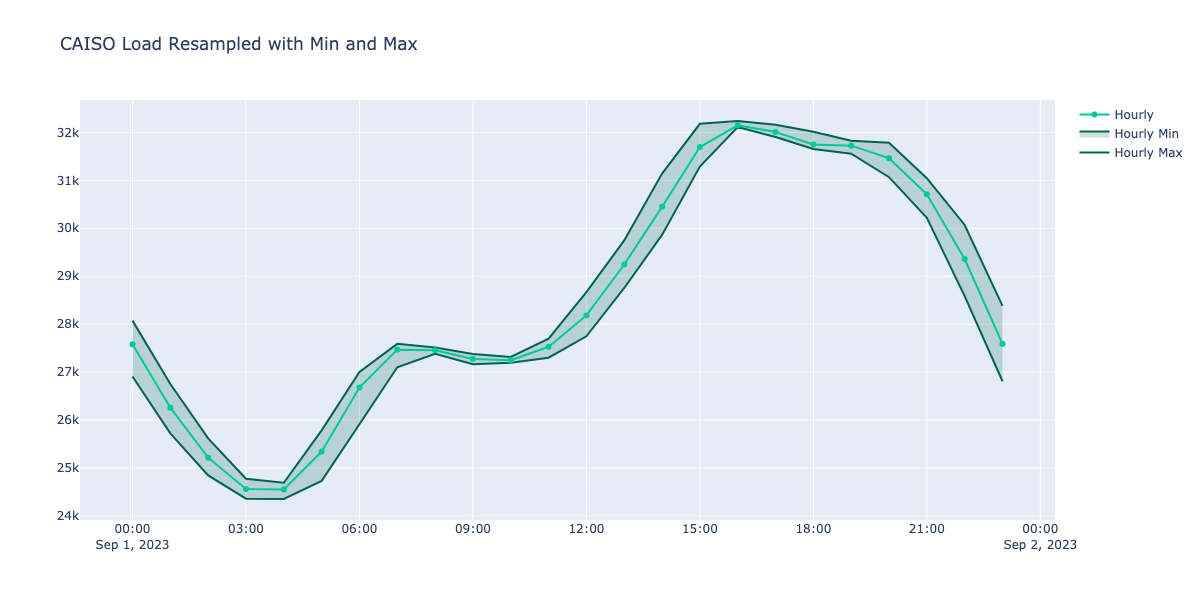

In [9]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_hourly_max["interval_start_local"],
        y=df_hourly_max["load"],
        name="Hourly Max",
        mode="lines",
        line=dict(color="rgb(0,100,80)"),
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly_min["interval_start_local"],
        y=df_hourly_min["load"],
        name="Hourly Min",
        mode="lines",
        line=dict(color="rgb(0,100,80)"),
        fill="tonexty",
        fillcolor="rgba(0,100,80,0.2)",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_hourly["interval_start_local"],
        y=df_hourly["load"],
        name="Hourly",
        mode="lines+markers",
    )
)

fig.update_layout(title="CAISO Load Resampled with Min and Max")

fig.show("png", width=1200, height=600)

## Specifying Columns to Resample
When dealing with multiple numeric columns, you can choose which ones to resample by using the columns parameter. Here the `ercot_real_time_as_monitor` dataset is a 8 second interval dataset.

In [10]:
prc_df_raw = client.get_dataset(
    dataset="ercot_real_time_as_monitor",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    columns=["prc"],
    timezone="market",
    limit=QUERY_LIMIT,
)

prc_df_raw

2025-07-28 10:38:23 - INFO - Fetching Page 1...
2025-07-28 10:38:23 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_real_time_as_monitor/query
2025-07-28 10:38:23 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-09-02 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'columns': 'prc', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:23 - INFO - Done in 0.34 seconds. 
2025-07-28 10:38:23 - INFO - Total rows: 8,010/10,000 (80.1% of limit)
2025-07-28 10:38:23 - INFO - Total number of rows: 8010


time_local                  time_utc   prc
0    2023-09-01 00:00:06-05:00 2023-09-01 05:00:06+00:00  8417
1    2023-09-01 00:00:14-05:00 2023-09-01 05:00:14+00:00  8577
2    2023-09-01 00:00:22-05:00 2023-09-01 05:00:22+00:00  8577
3    2023-09-01 00:00:30-05:00 2023-09-01 05:00:30+00:00  8598
4    2023-09-01 00:00:38-05:00 2023-09-01 05:00:38+00:00  8619
...                        ...                       ...   ...
8005 2023-09-01 23:59:14-05:00 2023-09-02 04:59:14+00:00  9060
8006 2023-09-01 23:59:26-05:00 2023-09-02 04:59:26+00:00  8920
8007 2023-09-01 23:59:34-05:00 2023-09-02 04:59:34+00:00  8920
8008 2023-09-01 23:59:46-05:00 2023-09-02 04:59:46+00:00  8899
8009 2023-09-01 23:59:54-05:00 2023-09-02 04:59:54+00:00  8620

[8010 rows x 3 columns]

to make the data easier to work with, we can resample to regular 1 minute intervals. 

In [11]:
prc_df_1min = client.get_dataset(
    dataset="ercot_real_time_as_monitor",
    start="Sep 1, 2023",
    end="Sep 2, 2023",
    resample="1 minute",
    columns=["prc"],
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

prc_df_1min

2025-07-28 10:38:23 - INFO - Fetching Page 1...
2025-07-28 10:38:23 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_real_time_as_monitor/query
2025-07-28 10:38:23 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-09-02 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': '1 minute', 'resample_by': None, 'resample_function': 'mean', 'publish_time': None, 'timezone': 'US/Central', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'columns': 'prc', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:23 - INFO - Done in 0.4 seconds. 
2025-07-28 10:38:23 - INFO - Total rows: 1,440/10,000 (14.4% of limit)
2025-07-28 10:38:23 - INFO - Total number of rows: 1440


interval_start_local        interval_start_utc  \
0    2023-09-01 00:00:00-05:00 2023-09-01 05:00:00+00:00   
1    2023-09-01 00:01:00-05:00 2023-09-01 05:01:00+00:00   
2    2023-09-01 00:02:00-05:00 2023-09-01 05:02:00+00:00   
3    2023-09-01 00:03:00-05:00 2023-09-01 05:03:00+00:00   
4    2023-09-01 00:04:00-05:00 2023-09-01 05:04:00+00:00   
...                        ...                       ...   
1435 2023-09-01 23:55:00-05:00 2023-09-02 04:55:00+00:00   
1436 2023-09-01 23:56:00-05:00 2023-09-02 04:56:00+00:00   
1437 2023-09-01 23:57:00-05:00 2023-09-02 04:57:00+00:00   
1438 2023-09-01 23:58:00-05:00 2023-09-02 04:58:00+00:00   
1439 2023-09-01 23:59:00-05:00 2023-09-02 04:59:00+00:00   

            interval_end_local          interval_end_utc          prc  
0    2023-09-01 00:01:00-05:00 2023-09-01 05:01:00+00:00  8573.666667  
1    2023-09-01 00:02:00-05:00 2023-09-01 05:02:00+00:00  8693.333333  
2    2023-09-01 00:03:00-05:00 2023-09-01 05:03:00+00:00  8739.600000  
3    2023-09-01 00:04:00-05:00 2023-09-01 05:04:00+00:00  8771.000000  
4    2023-09-01 00:05:00-05:00 2023-09-01 05:05:00+00:00  8830.200000  
...                        ...                       ...          ...  
1435 2023-09-01 23:56:00-05:00 2023-09-02 04:56:00+00:00  9187.333333  
1436 2023-09-01 23:57:00-05:00 2023-09-02 04:57:00+00:00  9187.666667  
1437 2023-09-01 23:58:00-05:00 2023-09-02 04:58:00+00:00  9168.666667  
1438 2023-09-01 23:59:00-05:00 2023-09-02 04:59:00+00:00  9138.500000  
1439 2023-09-02 00:00:00-05:00 2023-09-02 05:00:00+00:00  8925.833333  

[1440 rows x 5 columns]

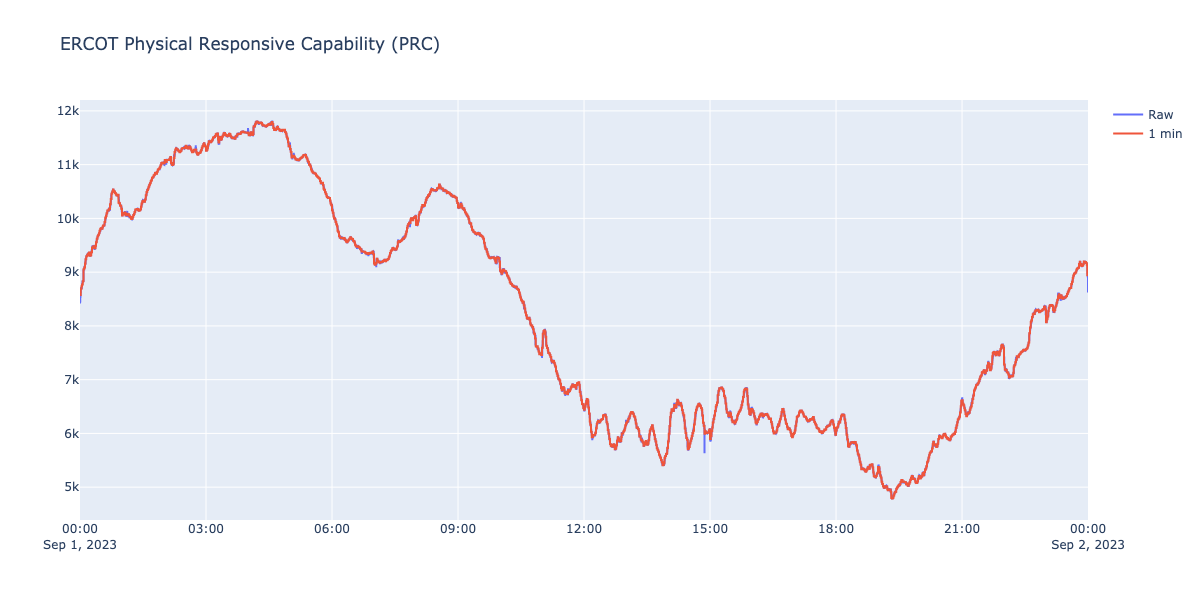

In [12]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=prc_df_raw["time_local"],
        y=prc_df_raw["prc"],
        name="Raw",
        mode="lines",
    )
)

fig.add_trace(
    go.Scatter(
        x=prc_df_1min["interval_start_local"],
        y=prc_df_1min["prc"],
        name="1 min",
        mode="lines",
        line_shape="hv",
    )
)

fig.update_layout(title="ERCOT Physical Responsive Capability (PRC)")

fig.show("png", width=1200, height=600)

## Specifying Columns to "group by" for Resampling in Multi-Series Datasets
In datasets with multiple time series, you may want to specify which columns to group by before resampling. For instance, in the EIA dataset that includes interchange data between balancing authorities, you can use the `resample_by` parameter to select specific columns.

Here's an example using the `eia_ba_interchange_hourly` dataset:

In [13]:
eia_daily_interchange = client.get_dataset(
    dataset="eia_ba_interchange_hourly",
    start="Sep 1, 2023",
    end="Oct 1, 2023",
    resample="1 day",
    resample_by=["interval_start_utc", "to_ba", "from_ba"],
    timezone="market",
    limit=QUERY_LIMIT,
)

eia_daily_interchange

2025-07-28 10:38:23 - INFO - Fetching Page 1...
2025-07-28 10:38:23 - INFO - GET https://api.gridstatus.io/v1/datasets/eia_ba_interchange_hourly/query
2025-07-28 10:38:23 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-10-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': '1 day', 'resample_by': 'interval_start_utc,to_ba,from_ba', 'resample_function': 'mean', 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 10:38:24 - INFO - Done in 0.81 seconds. 
2025-07-28 10:38:24 - INFO - Total rows: 10,000/10,000 (100.0% of limit)
2025-07-28 10:38:24 - INFO - Total number of rows: 10000


interval_start_utc          interval_end_utc to_ba from_ba  \
0    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI    MISO   
1    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI     SPA   
2    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI    SWPP   
3    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI     TVA   
4    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AESO    NWMT   
...                        ...                       ...   ...     ...   
9995 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00   IID    AZPS   
9996 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00   IID    CISO   
9997 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00   IID    WALC   
9998 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00  IPCO     AVA   
9999 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00  IPCO    BPAT   

              mw  
0      65.041667  
1      71.958333  
2     342.250000  
3    -152.458333  
4      65.625000  
...          ...  
9995   -7.125000  
9996 -412.333333  
9997  -13.791667  
9998  -84.375000  
9999 -100.250000  

[10000 rows x 5 columns]

**Resampling large datasets (such as pricing datasets) can be slow, given the number of rows to compute at query time.**

See the below example using `ercot_lmp_by_settlement_point` for a 1 hour resample.

In [18]:
ercot_lmp_by_settlement_point_hourly = client.get_dataset(
    dataset="ercot_lmp_by_settlement_point",
    start="Sep 1, 2023",
    end="Oct 1, 2023",
    resample="1 hour",
    resample_by=["sced_timestamp_utc", "location"],
    timezone="market",
    limit=QUERY_LIMIT,
)

eia_daily_interchange

2025-07-28 11:25:49 - INFO - Fetching Page 1...
2025-07-28 11:25:49 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_lmp_by_settlement_point/query
2025-07-28 11:25:49 - INFO - Params: {'start_time': Timestamp('2023-09-01 00:00:00'), 'end_time': Timestamp('2023-10-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': '1 hour', 'resample_by': 'sced_timestamp_utc,location', 'resample_function': 'mean', 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 11:26:59 - INFO - Done in 69.77 seconds. 
2025-07-28 11:26:59 - INFO - Total rows: 10,000/10,000 (100.0% of limit)
2025-07-28 11:26:59 - INFO - Total number of rows: 10000


interval_start_utc          interval_end_utc to_ba from_ba  \
0    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI    MISO   
1    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI     SPA   
2    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI    SWPP   
3    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AECI     TVA   
4    2023-09-01 00:00:00+00:00 2023-09-02 00:00:00+00:00  AESO    NWMT   
...                        ...                       ...   ...     ...   
9995 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00   IID    AZPS   
9996 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00   IID    CISO   
9997 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00   IID    WALC   
9998 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00  IPCO     AVA   
9999 2023-09-30 00:00:00+00:00 2023-10-01 00:00:00+00:00  IPCO    BPAT   

              mw  
0      65.041667  
1      71.958333  
2     342.250000  
3    -152.458333  
4      65.625000  
...          ...  
9995   -7.125000  
9996 -412.333333  
9997  -13.791667  
9998  -84.375000  
9999 -100.250000  

[10000 rows x 5 columns]